# Vendor Payments Analysis
This notebook performs a thorough analysis on a vendor payments dataset.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### We Load the CSV dataset stored in the same directory as the notebook

In [7]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

### We clean and prepare the dataset

In [10]:
def clean_data(df):
    df.columns = df.columns.str.strip().str.replace(" ", "_")
    if 'RUNDATE' in df.columns:
        df['RUNDATE'] = pd.to_datetime(df['RUNDATE'], errors='coerce')
    df['VENDOR'] = df['VENDOR'].str.strip().str.title()
    df = df.dropna(subset=['VENDOR', 'CHKSUBTOT', 'RUNDATE'])
    df['CHKSUBTOT'] = pd.to_numeric(df['CHKSUBTOT'], errors='coerce')
    df = df.dropna(subset=['CHKSUBTOT'])
    return df

### We print general statistics and missing value report

In [13]:
def generate_summary(df):
    print("Dataset Summary:")
    print(df.describe(include='all'))
    print("\nMissing values per column:\n", df.isnull().sum())

### We Calculate total payment per vendor

In [16]:
def total_payments_by_vendor(df):
    vendor_totals = df.groupby('VENDOR')['CHKSUBTOT'].sum().sort_values(ascending=False)
    print("\nTop 10 Vendors by Total Payments:")
    print(vendor_totals.head(20))
    return vendor_totals

### We plot trend of total monthly payments

In [19]:
def monthly_trend(df):
    monthly = df.set_index('RUNDATE').resample('ME')['CHKSUBTOT'].sum()
    plt.figure(figsize=(12, 6))
    monthly.plot()
    plt.title('Monthly Vendor Payments')
    plt.ylabel('Total Amount')
    plt.xlabel('Date')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### We identify outlier payments in the top 1% of amount

In [22]:
def detect_anomalies(df):
    threshold = df['CHKSUBTOT'].quantile(0.99)
    outliers = df[df['CHKSUBTOT'] > threshold]
    print(f"\nPayments above 99th percentile (> {threshold:.2f}): {len(outliers)} rows")
    return outliers

### We count how many times each vendor has been paid

In [25]:
def payment_frequency(df):
    freq = df['VENDOR'].value_counts()
    print("\nVendors by Payment Frequency:")
    print(freq.head(10))
    return freq

### We plot heatmap of vendor spending by department (if Department column exists)

In [28]:
def department_vendor_heatmap(df):
    if 'DEPARTMENT' in df.columns:
        pivot = df.pivot_table(index='VENDOR', columns='DEPARTMENT', values='CHKSUBTOT', aggfunc='sum', fill_value=0)
        plt.figure(figsize=(14, 8))
        sns.heatmap(pivot.head(20), cmap='YlGnBu', annot=True, fmt=".0f")
        plt.title("Top 20 Vendors by Department Spending")
        plt.tight_layout()
        plt.show()

### We complete workflow to run all steps in order

In [31]:
def run_analysis(file_path):
    df = load_data(file_path)
    df = clean_data(df)
    generate_summary(df)
    vendor_totals = total_payments_by_vendor(df)
    monthly_trend(df)
    anomalies = detect_anomalies(df)
    payment_frequency(df)
    department_vendor_heatmap(df)
    vendor_totals.to_csv("total_payments_by_vendor.csv")
    anomalies.to_csv("anomalous_payments.csv")

/var/folders/9n/mqxgz_yj67j4r6yk7yp0y0kh0000gn/T/ipykernel_9452/396243316.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['RUNDATE'] = pd.to_datetime(df['RUNDATE'], errors='coerce')


Dataset Summary:
                              RUNDATE             FY             FM  \
count                          127133  127133.000000  127133.000000   
unique                            NaN            NaN            NaN   
top                               NaN            NaN            NaN   
freq                              NaN            NaN            NaN   
mean    2024-05-06 15:36:59.499264512    2024.217025       5.079122   
min               2023-10-02 00:00:00    2024.000000       1.000000   
25%               2023-12-20 00:00:00    2024.000000       2.000000   
50%               2024-04-29 00:00:00    2024.000000       4.000000   
75%               2024-09-11 00:00:00    2024.000000       8.000000   
max               2025-01-02 00:00:00    2025.000000      12.000000   
std                               NaN       0.412221       3.522485   

                      DOCID     CHKSUBTOT         VCODE  \
count                127133  1.271330e+05        127133   
unique      

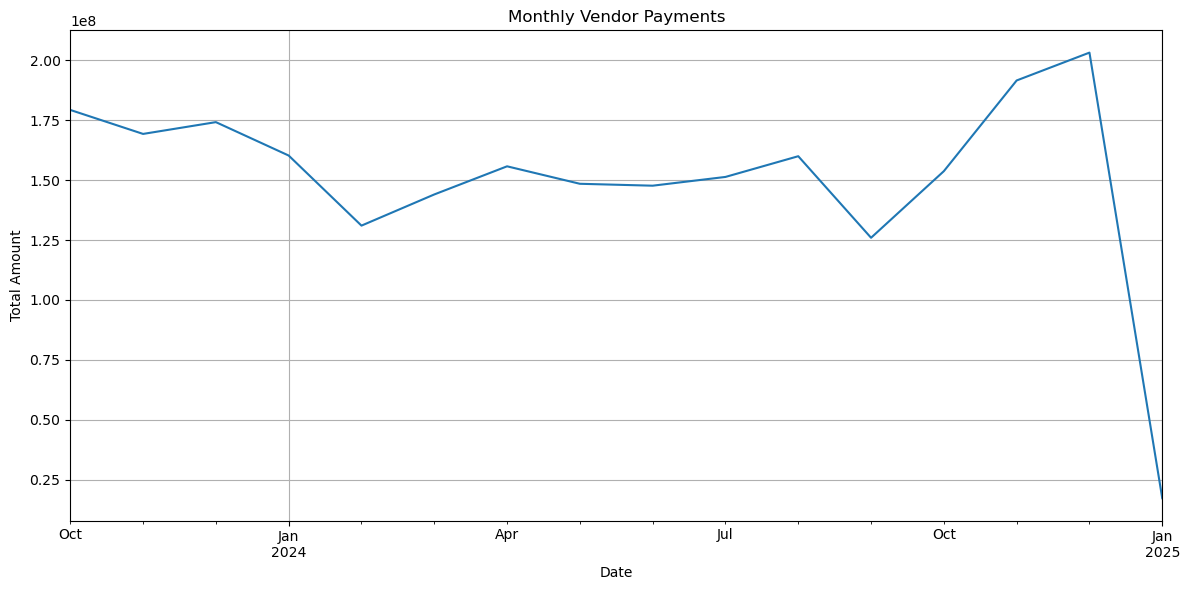


Payments above 99th percentile (> 313185.81): 1272 rows

Vendors by Payment Frequency:
VENDOR
Smith Temporaries, Inc                  9388
Cintas Corporation 2                    2754
Marco Holdings I, Llc                   2451
Cellco Partnership                      2171
Northern Imports                        2161
Universal Protection Service Lp         1682
Sid Tool Co., Inc                       1614
Sam Pack'S Five Star Ford               1539
United Rentals (North America), Inc.    1383
Ed Morse Automotive, Llc                1345
Name: count, dtype: int64


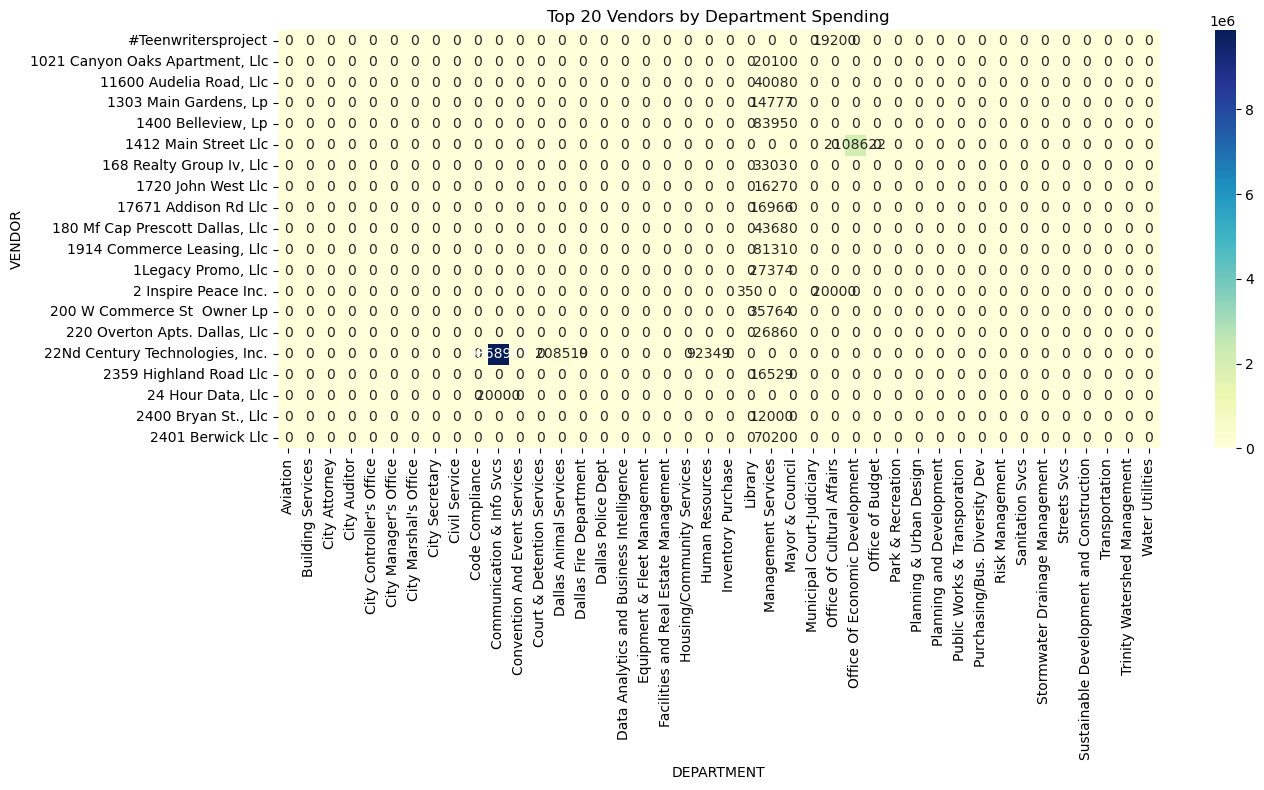

In [44]:
# We execute our analysis on the dataset it
run_analysis("Vendor_Payments_2019_2025.csv")